In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

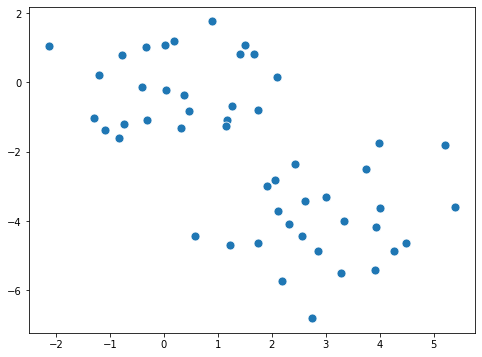

In [ ]:
np.random.seed(123)
X = np.random.randn(50,2)
X[0:25, 0] = X[0:25, 0] + 3
X[0:25, 1] = X[0:25, 1] - 4

plt.figure(figsize=(8,6))
sb.scatterplot(X[:,0], X[:,1], s=80)
plt.show()

## K-Means Clustering

Total sum of squares within-cluster: 125.86


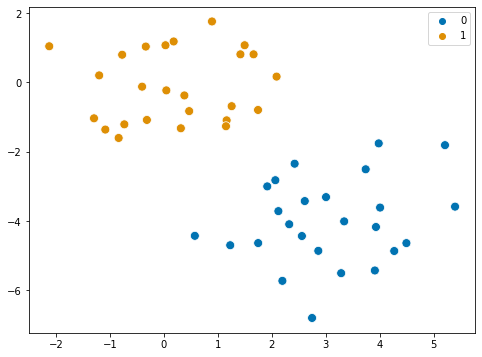

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)
y = kmeans.labels_
print('Total sum of squares within-cluster: {:.2f}'.format(kmeans.inertia_))

plt.figure(figsize=(8,6))
sb.scatterplot(X[:,0], X[:,1], hue=y, s=80, palette='colorblind')
plt.show()

Total sum of squares within-cluster: 99.30


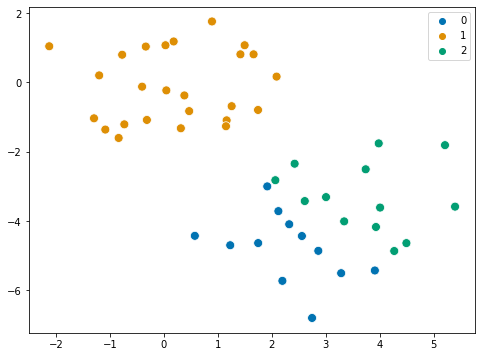

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
y = kmeans.labels_
print('Total sum of squares within-cluster: {:.2f}'.format(kmeans.inertia_))

plt.figure(figsize=(8,6))
sb.scatterplot(X[:,0], X[:,1], hue=y, s=80, palette='colorblind')
plt.show()

## Hierarchical Clustering

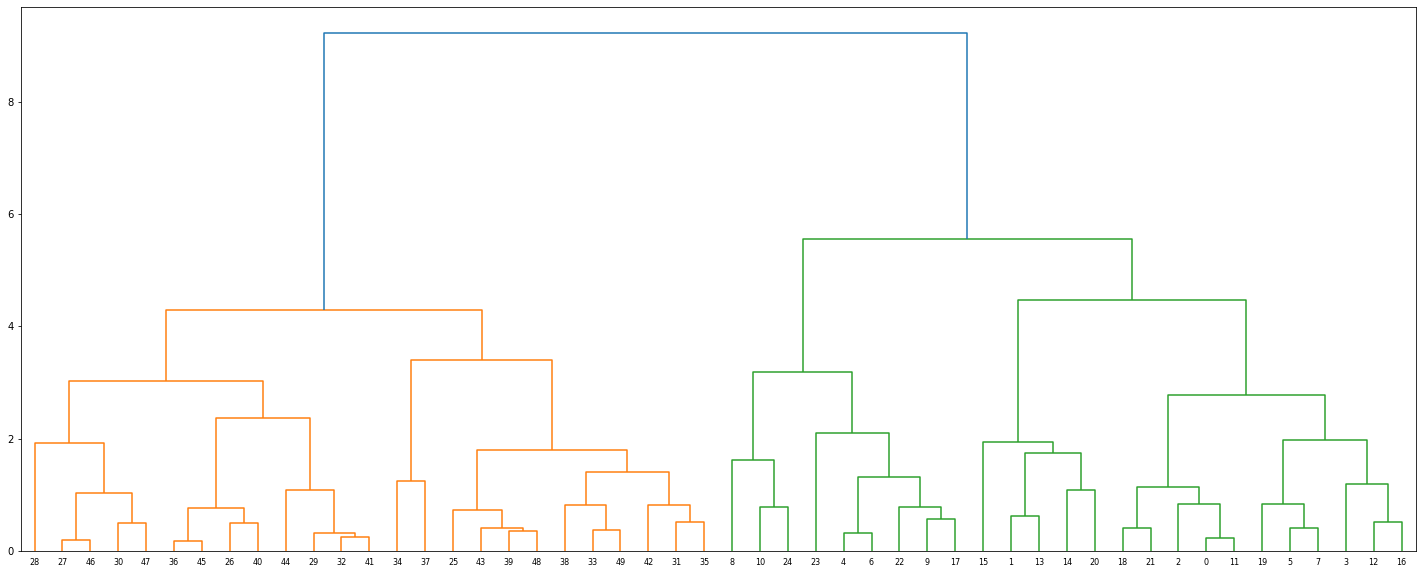

In [ ]:
plt.figure(figsize=(25,10))
dendrogram(linkage(X, 'complete'), leaf_rotation=0);

In [ ]:
cut_tree(linkage(X, 'complete'), n_clusters=2).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

## Application on NCI60 Data

In [ ]:
data = pd.read_csv('data/NCI60.csv', index_col=0)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

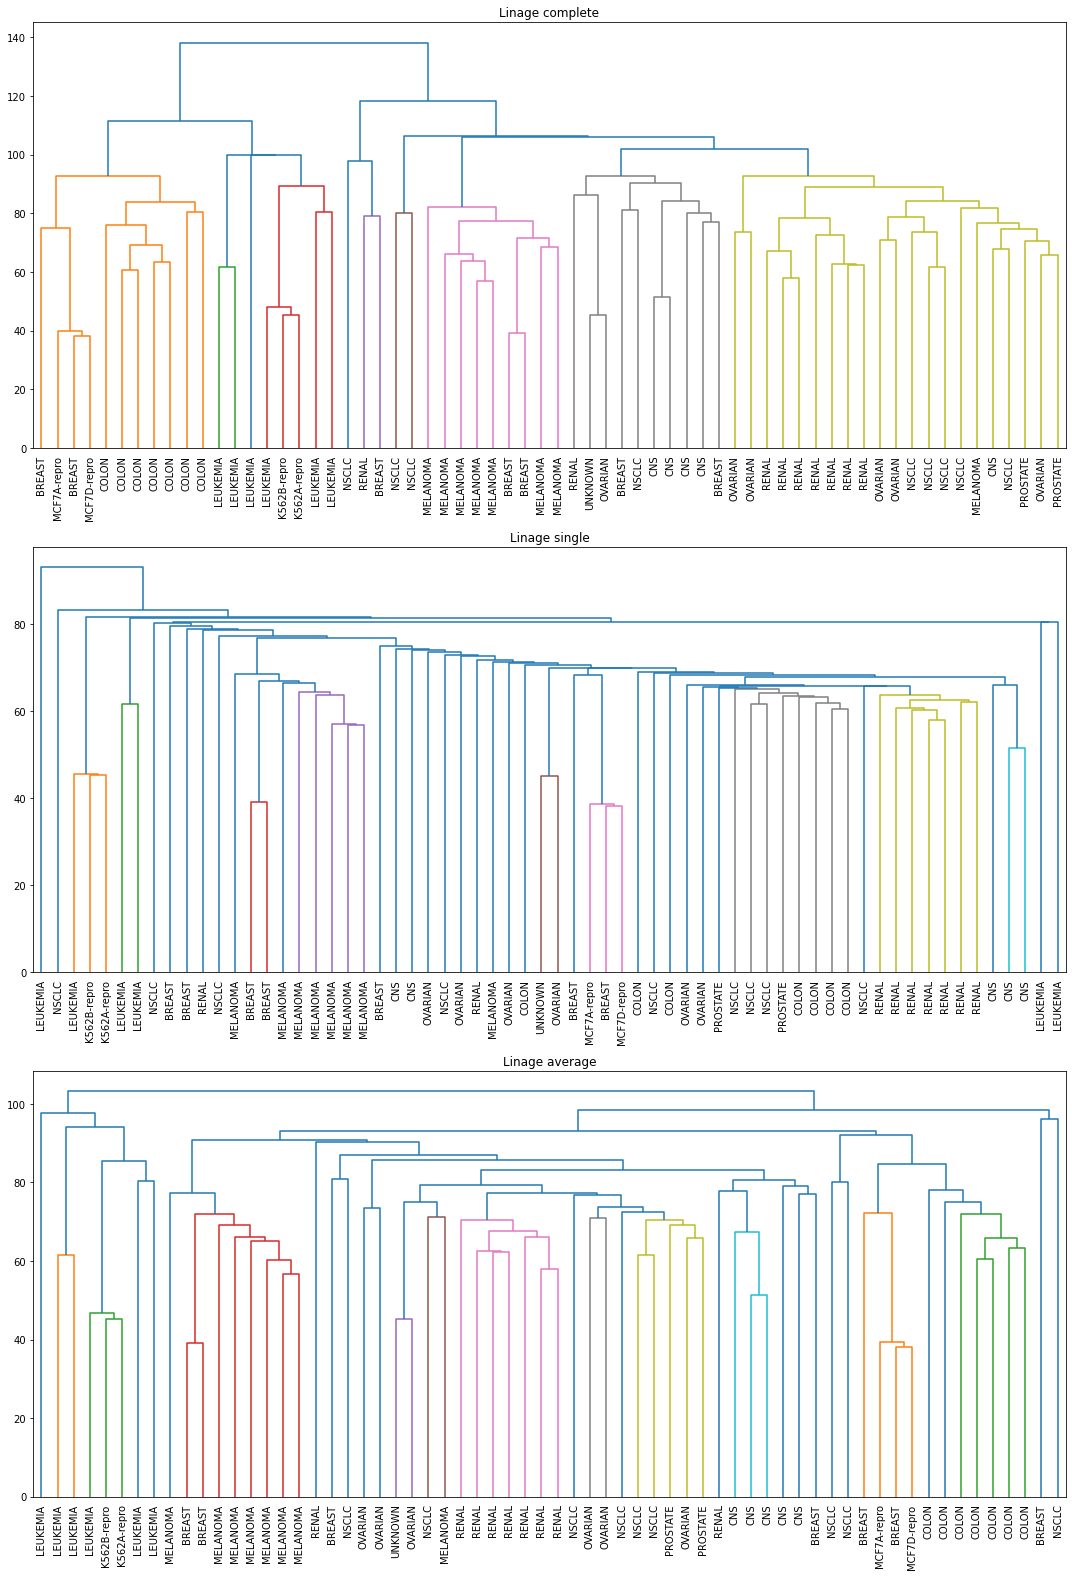

In [ ]:
plt.figure(figsize=(15,22))
i = 0
for link in ['complete', 'single', 'average']:
    i = i + 1
    plt.subplot(3,1,i)
    plt.title('Linage {}'.format(link))
    dendrogram(linkage(X, link), labels=y.tolist(), leaf_font_size=10);
plt.tight_layout()

In [ ]:
cut_4 = cut_tree(linkage(X, 'complete'), n_clusters=4)
pd.crosstab(index=y, columns=cut_4.flatten(), rownames=['Cancer Type'], colnames=['Cluster'])

Cluster,0,1,2,3
Cancer Type,,,,
BREAST,4,1,0,2
CNS,5,0,0,0
COLON,0,0,0,7
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


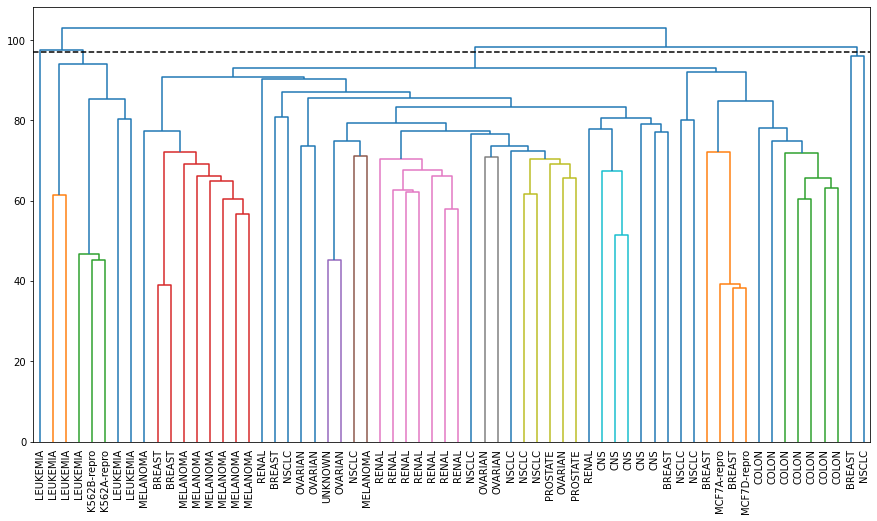

In [ ]:
plt.figure(figsize=(15,8))
dendrogram(linkage(X, link), labels=y.tolist(), leaf_font_size=10)
plt.axhline(y=97, c='k', ls='dashed')
plt.show()

In [ ]:
kmeans_4 = KMeans(n_clusters=4, random_state=1, n_init=100).fit(X)
kmeans_4.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
cut_4.flatten()

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Changes number for Kmeans
x = kmeans_4.labels_
conditions = [x==0,x==1,x==2,x==3]
choices = [0,3,1,2]
kmeans_4_changes = np.select(conditions, choices)
kmeans_4_changes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
pd.crosstab(index=y, columns=cut_4.flatten(), rownames=['Cancer-types'], colnames=['Hierarchical'])

Hierarchical,0,1,2,3
Cancer-types,,,,
BREAST,4,1,0,2
CNS,5,0,0,0
COLON,0,0,0,7
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


In [ ]:
pd.crosstab(index=y, columns=kmeans_4_changes, rownames=['Cancer-types'], colnames=['K-Means'])

K-Means,0,1,2,3
Cancer-types,,,,
BREAST,3,2,0,2
CNS,5,0,0,0
COLON,0,0,0,7
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,5,1
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,1,7,0,0


In [ ]:
# The result of clustering columns 0 and 2 of both method seem same results

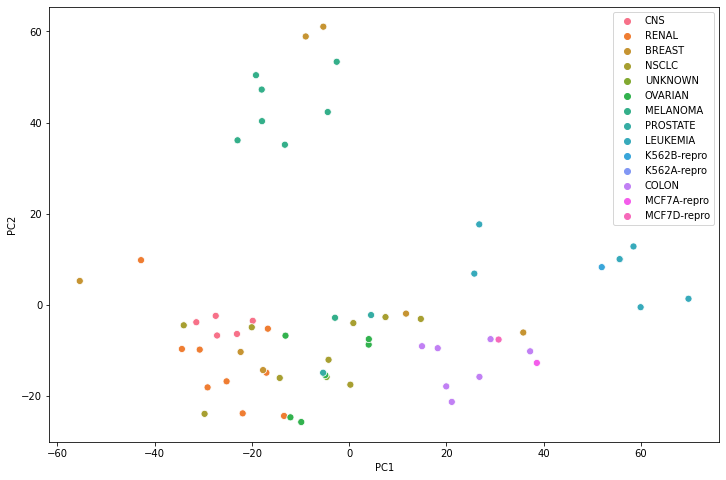

In [ ]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

pca = PCA()
pc_names = ['PC{}'.format(x) for x in np.arange(1, 64+1)]
pc = pca.fit_transform(X_scaled)
pc = pd.DataFrame(pc, columns=pc_names)
# loadings = pca.components_.T
# loadings = pd.DataFrame(loadings, columns=pc_names, index=X_scaled.columns)

plt.figure(figsize=(12,8))
sb.scatterplot(data=pc, x='PC1', y='PC2', hue=y.tolist(), s=50);
# for i in range(len(X.columns)):
#     plt.arrow(0,0,loadings['PC1'][i]*1.5, loadings['PC2'][i]*1.5, shape='full', width=0.01, color='red')
    # plt.text(loadings['PC1'][i]*1.5*1.2, loadings['PC2'][i]*1.5*1.2, loadings.index[i], size=12, color='green')

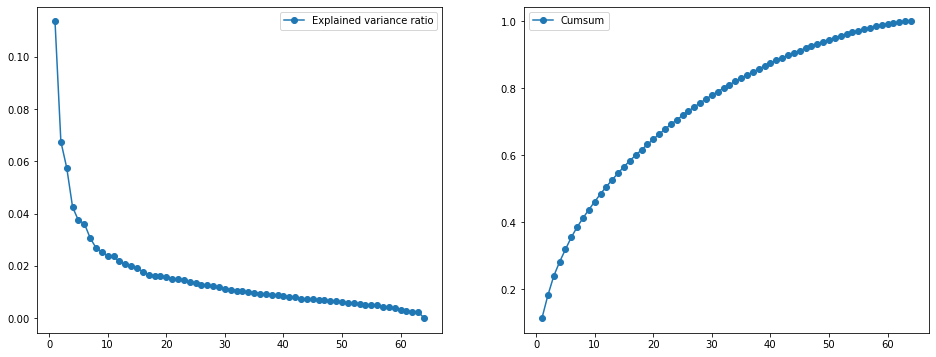

In [ ]:
plt.figure(figsize=(16,6))
range = np.arange(1,65)
plt.subplot(1,2,1)
plt.plot(range, pca.explained_variance_ratio_, '-', marker='o', label='Explained variance ratio')
# plt.xticks(range)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range, pca.explained_variance_ratio_.cumsum(), '-', marker='o', label='Cumsum')
# plt.xticks(range)
plt.legend()
plt.show()